# KELOMPOK 6 DATA MINING


#### Data Hujan Australia

### IMPORT LIBRARY

In [ ]:
# import library yang digunakan untuk pengolahan data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize' : (5,5)})

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2

### LOADING DATA

In [ ]:
# membaca data
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
df.shape

(145460, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.columns.values

array(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'], dtype=object)

### STATISTIK DESKRIPTIF

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


### PREPROCESSING DATA

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
df = df.dropna(subset=['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall','Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed','WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm','Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm','Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday','RainTomorrow']).reset_index()

In [ ]:
df.isnull().sum()

index            0
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

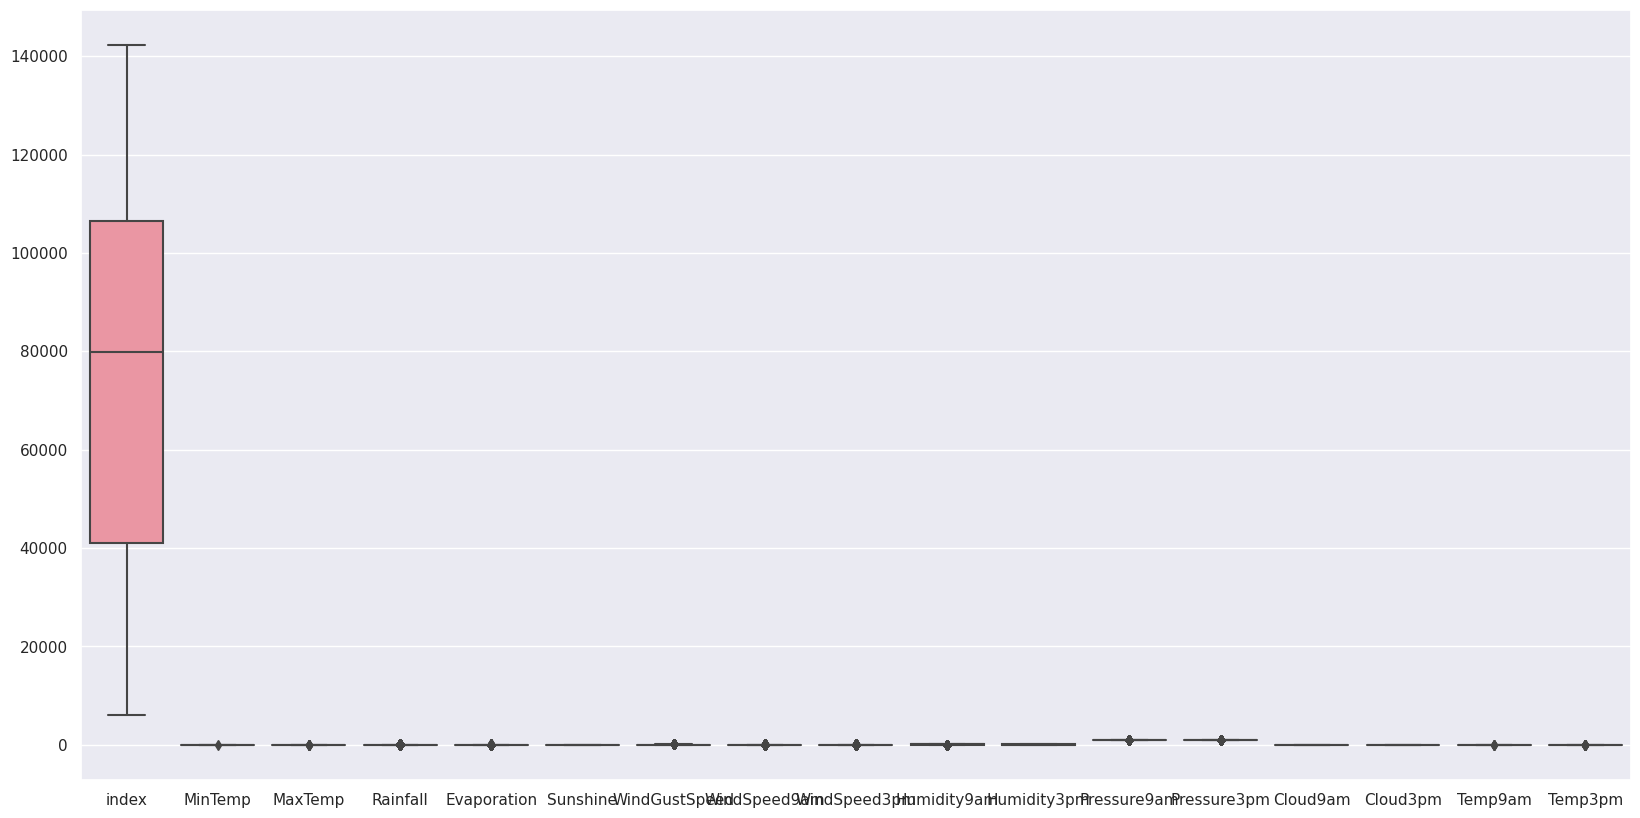

In [ ]:
plt.figure(figsize = (20,10))
sns.boxplot(df)
plt.show()

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = np.percentile(col, [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return lower_range, upper_range

In [ ]:
for column in df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm','Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']]:
    lr, ur = remove_outlier(df[column])
    df[column] = np.where(df[column] > ur, ur, df[column])
    df[column] = np.where(df[column] < lr, lr, df[column])

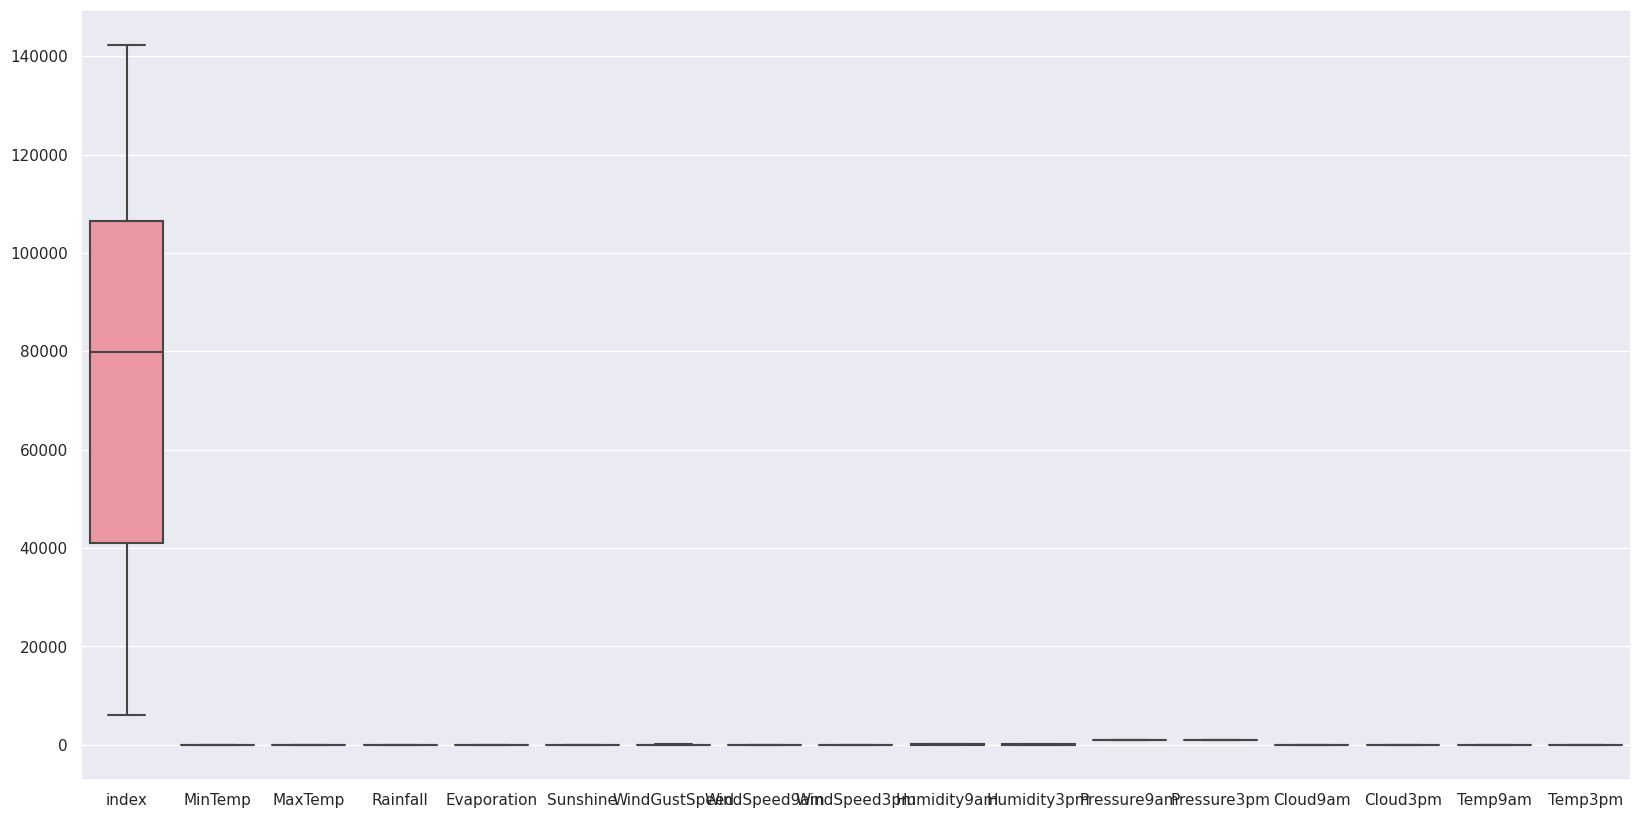

In [ ]:
plt.figure(figsize = (20,10))
sns.boxplot(df)
plt.show()

In [ ]:
# mendefinisikan X dan y
df = df.copy()
X = df.drop(columns='RainTomorrow', axis=1)
y = df.copy().RainTomorrow
X.head()

,index,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,...,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No
1,6050,2009-01-02,Cobar,18.4,28.9,0.0,14.3,13.0,S,37.0,...,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No
2,6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,...,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No
3,6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,...,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No
4,6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,...,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No


### ENCODING

In [ ]:
# mengkategorikan data menjadi categorical
categorical = [var for var in X if X[var].dtype=='object']
print("Number of categorical variables: ", len(categorical))
print(categorical)

Number of categorical variables:  6
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [ ]:
# mengganti nilai variabel menjadi numeric
X['RainToday'].replace({'No':0, 'Yes':1},inplace = True )
y.replace({'No':0, 'Yes':1},inplace = True)
y.replace({'No':0, 'Yes':1},inplace = True)

### TEST SPLIT

In [ ]:
# melakukan test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X

,index,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,...,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0
1,6050,2009-01-02,Cobar,18.4,28.9,0.0,14.3,13.0,S,37.0,...,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0
2,6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,...,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0
3,6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,...,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0
4,6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,...,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,...,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0
56416,142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,...,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0
56417,142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,...,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0
56418,142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,...,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
56415    0
56416    0
56417    0
56418    0
56419    0
Name: RainTomorrow, Length: 56420, dtype: int64

### EDA

In [ ]:
# melihat banyaknya data di variabel Rain Tomorrow
df['RainTomorrow'].value_counts()

No     43993
Yes    12427
Name: RainTomorrow, dtype: int64

<Axes: >

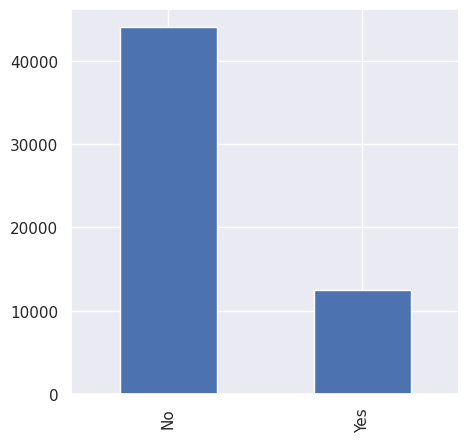

In [ ]:
df['RainTomorrow'].value_counts().plot(kind='bar')

In [ ]:
df.groupby('RainTomorrow').mean()

,index,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
RainTomorrow,,,,,,,,,,,,,,,,,
No,79692.414339,13.166624,24.765426,0.278192,5.665649,8.641254,39.105369,15.204180,19.362990,63.322824,44.714023,1018.176095,1015.635573,3.760075,3.779806,18.268375,23.376974
Yes,76990.841796,14.520286,22.285065,0.762783,4.560393,4.529597,46.171200,16.780438,21.149956,75.329203,66.905931,1014.015285,1011.884083,5.946729,6.261930,17.980309,20.348572


In [ ]:
df.groupby('RainToday').mean()

,index,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
RainToday,,,,,,,,,,,,,,,,,
No,79735.712362,13.297534,25.042318,0.074237,5.843735,8.393760,39.672688,15.187497,19.373243,62.253082,45.457073,1017.930007,1015.181313,3.798194,3.943082,18.543942,23.541637
Yes,76845.701412,14.054718,21.315335,1.480846,3.935323,5.414147,44.150217,16.834858,21.108771,79.068849,64.222597,1014.895013,1013.496959,5.806131,5.679024,17.009092,19.776248


### FUTURE SELECTION

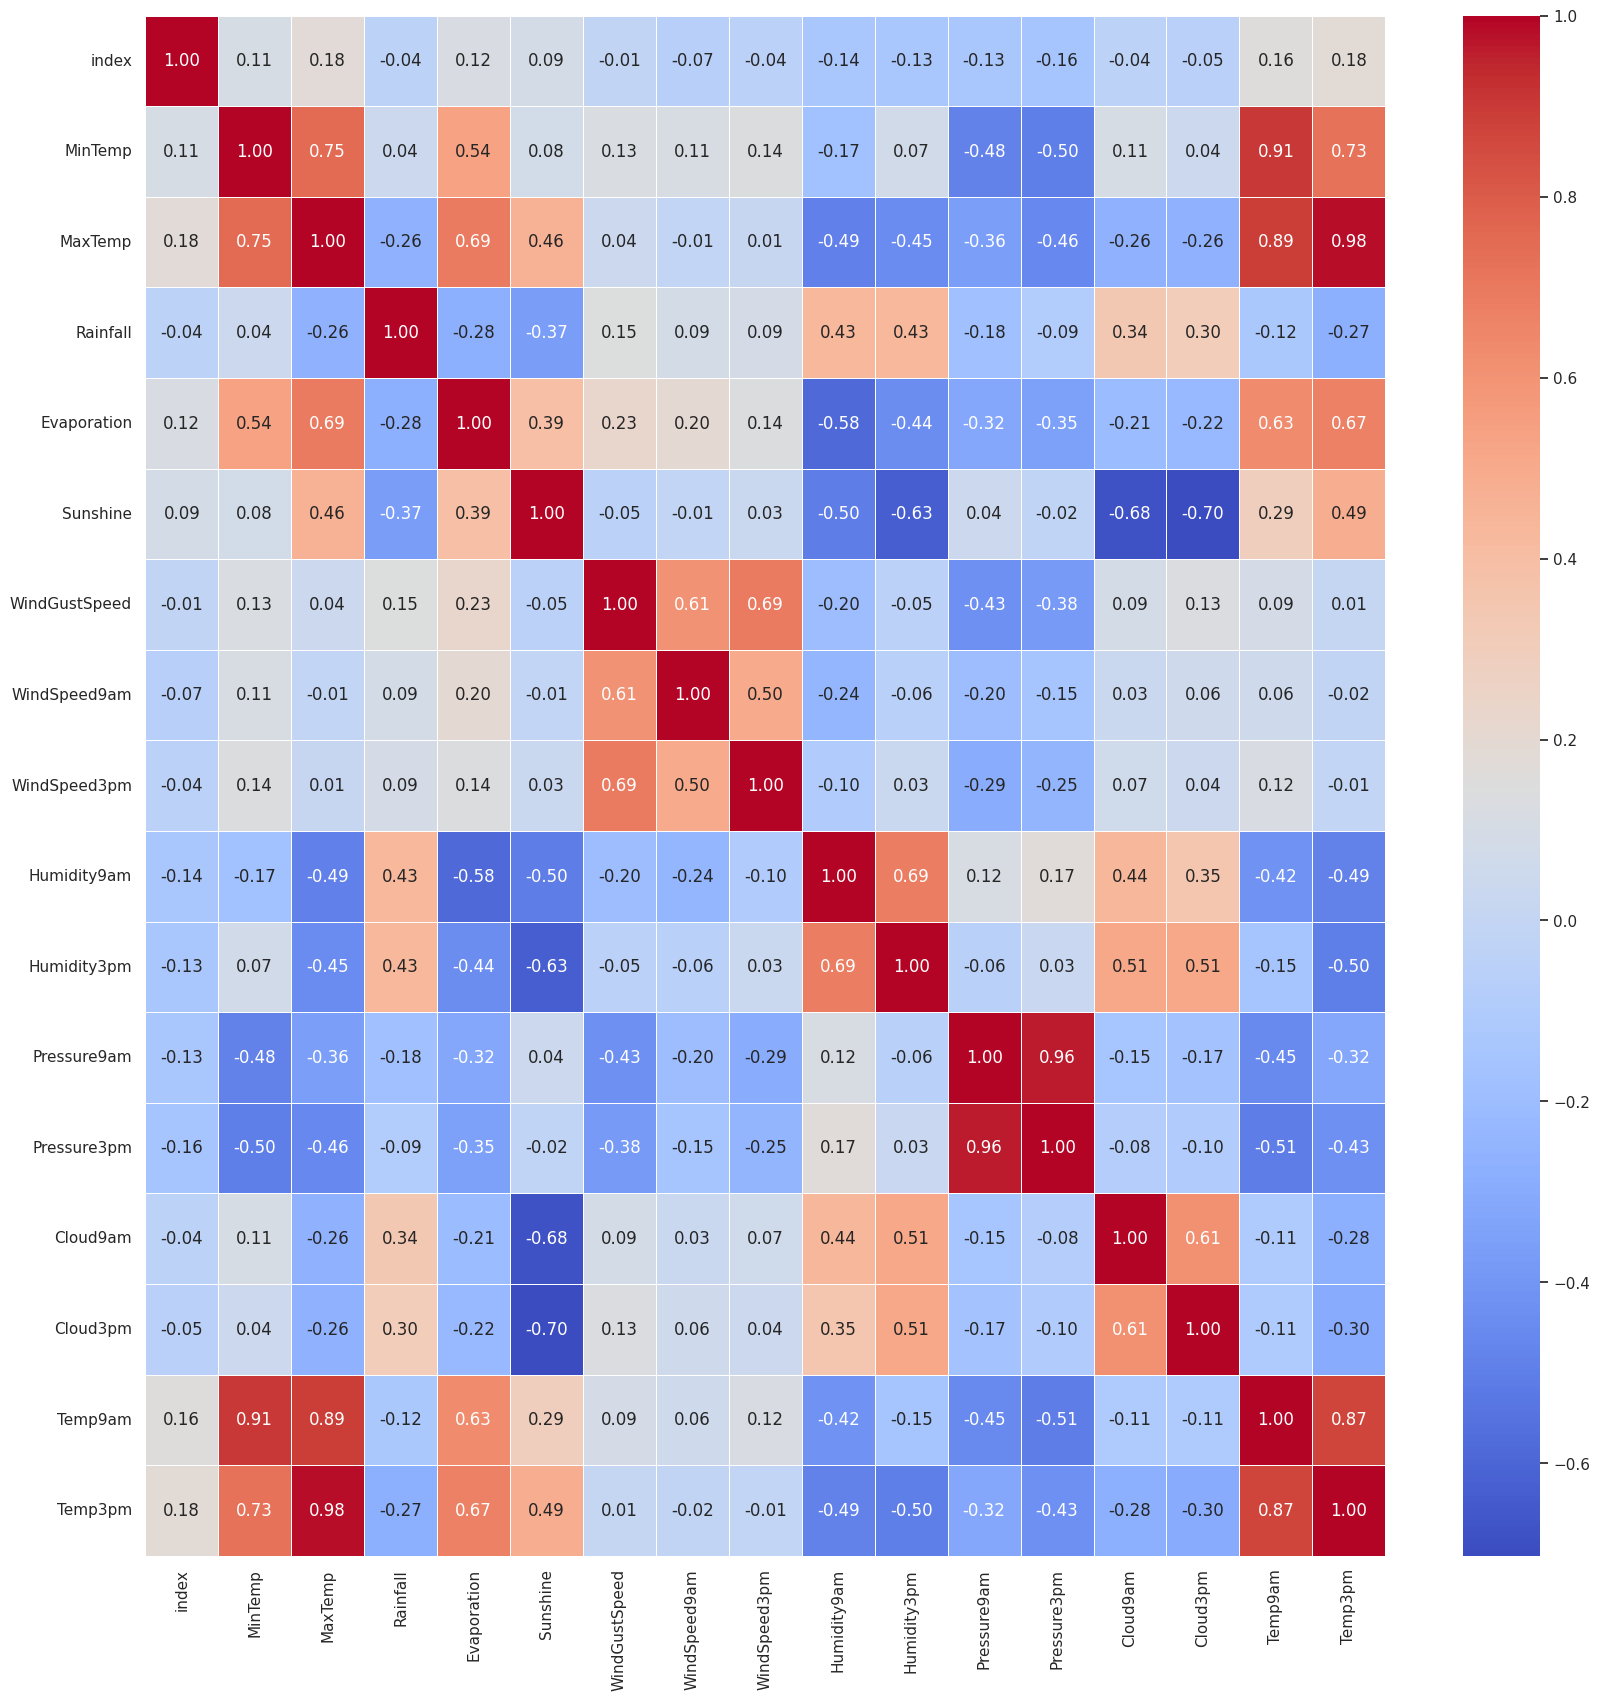

In [ ]:
# melakukan visualisasi untuk melihat korelasi dengan heatmap
fig, ax = plt.subplots(figsize=(20,20))
cm = sns.heatmap(df.corr(), linewidths = .5, annot=True, cmap ="coolwarm", fmt='.2f')

In [ ]:
X_trainfix = X_train.drop(columns=['index','Date', 'Evaporation', 'Sunshine', 'Cloud3pm', 'Cloud9am', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)

In [ ]:
X_trainfix

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
29641,18.0,29.2,0.0,35.0,15.0,17.0,40.0,26.0,1014.2,1011.9,25.3,27.8,0
45770,13.8,22.6,1.5,37.0,11.0,20.0,95.0,49.0,1018.9,1018.4,16.9,21.2,1
30633,15.9,25.6,0.6,31.0,13.0,15.0,58.0,53.0,1018.5,1016.9,22.9,23.8,0
40009,10.4,27.7,0.0,50.0,22.0,24.0,46.0,29.0,1022.7,1019.3,19.9,25.2,0
28650,3.1,14.1,0.0,19.0,6.0,7.0,93.0,54.0,1027.4,1024.5,6.0,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44732,8.3,19.3,1.5,28.0,6.0,13.0,81.0,48.0,1022.1,1021.8,14.5,18.9,1
54343,17.6,30.7,0.0,37.0,28.0,13.0,46.0,30.0,1015.6,1011.8,22.1,29.7,0
38158,10.3,18.2,0.2,24.0,6.0,7.0,78.0,57.0,1024.4,1022.9,14.0,17.6,0
860,18.9,28.2,0.0,37.0,19.0,17.0,77.0,73.0,1017.0,1016.1,25.3,26.9,0


In [ ]:
X_testfix = X_test.drop(columns=['index','Date', 'Evaporation', 'Sunshine', 'Cloud3pm', 'Cloud9am', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)

In [ ]:
X_testfix

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
15423,7.7,24.2,0.0,39.0,9.0,20.0,67.0,39.0,1018.4,1014.0,13.5,22.7,0
53403,18.3,30.8,0.0,44.0,26.0,24.0,19.0,8.0,1017.6,1013.7,21.7,29.8,0
6095,14.4,19.4,1.5,61.0,30.0,33.0,69.0,62.0,1009.1,1009.6,16.4,18.4,1
6667,11.8,18.6,0.0,56.0,20.0,28.0,50.0,42.0,1010.2,1008.5,14.8,17.4,0
48236,10.8,19.4,1.5,31.0,15.0,15.0,56.0,48.0,1023.5,1021.7,14.8,18.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22338,10.2,28.4,0.0,35.0,20.0,20.0,42.0,29.0,1024.1,1020.2,17.8,26.6,0
40693,17.8,34.3,0.0,54.0,11.0,11.0,47.0,22.0,1011.7,1009.3,24.8,34.0,0
7705,12.2,22.0,0.0,30.0,13.0,17.0,82.0,55.0,1031.7,1029.3,16.0,21.0,0
53465,25.2,37.0,0.0,41.0,19.0,28.0,64.0,51.0,1012.7,1007.5,29.6,33.0,0


### SCALLING DATA

In [ ]:
# scalling data untuk data bersifat numeric
scaler = StandardScaler()
X_trainscalling = scaler.fit_transform(X_trainfix[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday']])
X_testscalling = scaler.transform(X_testfix[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am','Pressure3pm','Temp9am','Temp3pm', 'RainToday']])

### MODEL

In [ ]:
# memanggil model
log_model = LogisticRegression(max_iter=1000)

In [ ]:
# fit model
log_model.fit(X_trainscalling, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# membuat prediksi dari model
y_predictlog= log_model.predict(X_testscalling)

In [ ]:
# membuat confusion matrix
confusionmatrixlog = confusion_matrix(y_test, y_predictlog)
confusionmatrixlog

array([[10432,   547],
       [ 1574,  1552]])

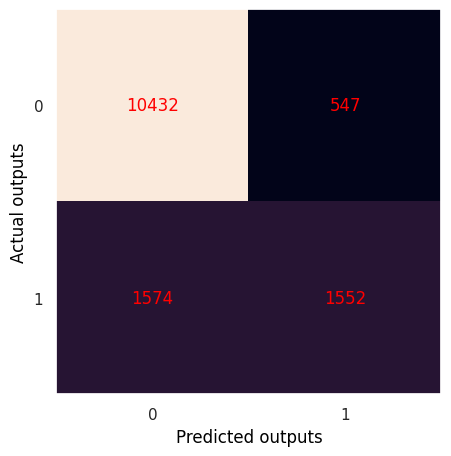

In [ ]:
cm = confusion_matrix(y_test, y_predictlog)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel("Predicted outputs", color="black")
ax.set_ylabel("Actual outputs", color="black")
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="red")
plt.show()

In [ ]:
# classification report
print(classification_report(y_test,y_predictlog))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     10979
           1       0.74      0.50      0.59      3126

    accuracy                           0.85     14105
   macro avg       0.80      0.72      0.75     14105
weighted avg       0.84      0.85      0.84     14105



In [ ]:
print("accuracy:", accuracy_score(y_test, y_predictlog) )

accuracy: 0.8496277915632754
